In [152]:
# Importing libraries
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import texthero as hero
from texthero import preprocessing
sb.set() # set the default Seaborn style for graphics
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates

In [153]:
# Datasets
steamData = pd.read_csv('steam_data/steam.csv')
steamSupportInfo = pd.read_csv('steam_data/steam_support_info.csv')
steamChart = pd.read_csv('steam_data/steamCharts.csv')
steamSpyTagData = pd.read_csv('steam_data/steamspy_tag_data.csv')
steamGames = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_games/steam_games*.csv"))))
steamMediaData = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_media_data/steam_media_data*.csv"))))
steamRequirements = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_requirements/steam_requirements*.csv"))))
steamDescription = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_description/steam_description*.csv"))))

#game reviews
steam_HalfOfTheGameReviews = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "steam_data/steam_reviews/steam_review_*.csv"))))
files = glob.glob("steam_data/steam_reviews" + '**/**' + "/*.csv")
steamReviews_fromFolder = pd.concat([pd.read_csv(f) for f in files ])
steamReviewsDF = [steam_HalfOfTheGameReviews, steamReviews_fromFolder]
steamCombinedReviews = pd.concat(steamReviewsDF)

C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (3,4,7,12,13,14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\justi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\justi\anaconda3\lib\site-packages\IP

In [154]:
# SteamGames Data
steamGames

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, W

In [155]:
# Renaming titles and columns for matching

steamGames = steamGames.rename(columns={"name": "title"})

#create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                   , preprocessing.lowercase
                   , preprocessing.remove_punctuation
                   , preprocessing.remove_diacritics
                   , preprocessing.remove_whitespace]

steamCombinedReviews['title'] = hero.clean(steamCombinedReviews['title'], pipeline = custom_pipeline)
steamGames['title'] = hero.clean(steamGames['title'], pipeline = custom_pipeline)
steamGames

,url,types,title,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,doom,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,playerunknown s battlegrounds,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,battletech,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,dayz,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,eve online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,https://store.steampowered.com/app/899836/Rock...,app,rocksmith(r) 2014 edition - remastered - sabat...,NaN,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, 

In [156]:
# Creating dataframe for title and game details
tags = pd.DataFrame(steamGames[['title','game_details']])
tags

,title,game_details
0,doom,"Single-player,Multi-player,Co-op,Steam Achieve..."
1,playerunknown s battlegrounds,"Multi-player,Online Multi-Player,Stats"
2,battletech,"Single-player,Multi-player,Online Multi-Player..."
3,dayz,"Multi-player,Online Multi-Player,Steam Worksho..."
4,eve online,"Multi-player,Online Multi-Player,MMO,Co-op,Onl..."
...,...,...
828,rocksmith(r) 2014 edition - remastered - sabat...,"Single-player,Shared/Split Screen,Downloadable..."
829,rocksmith(r) 2014 edition - remastered - stone...,"Single-player,Shared/Split Screen,Downloadable..."
830,fantasy grounds quests of doom 4 a midnight co...,"Multi-player,Co-op,Cross-Platform Multiplayer,..."
831,mega man x5 sound collection,"Single-player,Downloadable Content,Steam Achie..."


In [163]:
# Filtering out games in both tags and steamCombinedReviews
match_title = tags.title.isin(steamCombinedReviews.title)
steamUniqueTitle = tags[match_title]
steamUniqueTitle = steamUniqueTitle.drop_duplicates(['title'])
steamUniqueTitle = steamUniqueTitle.reset_index(drop=True)

nan_value = float("NaN")
steamUniqueTitle.replace("", nan_value, inplace=True)
steamUniqueTitle.dropna(subset = ["title"], inplace=True)
steamUniqueTitle

,title,game_details
0,playerunknown s battlegrounds,"Multi-player,Online Multi-Player,Stats"
1,battletech,"Single-player,Multi-player,Online Multi-Player..."
2,dayz,"Multi-player,Online Multi-Player,Steam Worksho..."
3,human fall flat,"Single-player,Online Multi-Player,Local Co-op,..."
4,they are billions,"Single-player,Steam Achievements,Steam Trading..."
...,...,...
133,atlas,"Online Multi-Player,MMO,Co-op,Online Co-op,Ste..."
134,metro exodus,"Single-player,Steam Achievements,Full controll..."
135,transport fever 2,"Single-player,Steam Achievements,Steam Workshop"
136,halo the master chief collection,"Single-player,Online Multi-Player,Online Co-op"


In [186]:
steamUniqueTitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 137
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         137 non-null    object
 1   game_details  137 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [165]:
# Filtering games with multiplayer in game details
multi = steamUniqueTitle[steamUniqueTitle['game_details'].str.contains('Multi-player', regex = False)]
multi

,title,game_details
0,playerunknown s battlegrounds,"Multi-player,Online Multi-Player,Stats"
1,battletech,"Single-player,Multi-player,Online Multi-Player..."
2,dayz,"Multi-player,Online Multi-Player,Steam Worksho..."
5,counter strike source,"Multi-player,Cross-Platform Multiplayer,Steam ..."
6,star wars(tm) empire at war gold pack,"Single-player,Multi-player,Online Multi-Player..."
...,...,...
127,among us,"Multi-player,Online Multi-Player,Local Multi-P..."
129,beasts of bermuda,"Multi-player,Online Multi-Player"
130,counter strike,"Multi-player,Online Multi-Player,Local Multi-P..."
132,sid meier s civilization(r) iii complete,"Single-player,Multi-player,Includes level editor"


In [173]:
# Solely multiplayer games
only_multi = multi[~multi.game_details.str.contains("Single-player")]
only_multi

,title,game_details
0,playerunknown s battlegrounds,"Multi-player,Online Multi-Player,Stats"
2,dayz,"Multi-player,Online Multi-Player,Steam Worksho..."
5,counter strike source,"Multi-player,Cross-Platform Multiplayer,Steam ..."
23,town of salem,"Multi-player,Cross-Platform Multiplayer,Steam ..."
25,the isle,"Multi-player,Partial Controller Support,Valve ..."
34,rising storm 2 vietnam,"Multi-player,Online Multi-Player,Steam Achieve..."
60,insurgency sandstorm,"Multi-player,Online Multi-Player,Online Co-op,..."
82,squad,"Multi-player,Online Multi-Player,Steam Trading..."
99,dead by daylight,"Multi-player,Online Multi-Player,Co-op,Online ..."
110,rust,"Multi-player,Online Multi-Player,MMO,Co-op,Onl..."


In [166]:
# Filtering games with single player 
single = steamUniqueTitle[steamUniqueTitle['game_details'].str.contains('Single-player', regex = False)]
single

,title,game_details
1,battletech,"Single-player,Multi-player,Online Multi-Player..."
3,human fall flat,"Single-player,Online Multi-Player,Local Co-op,..."
4,they are billions,"Single-player,Steam Achievements,Steam Trading..."
6,star wars(tm) empire at war gold pack,"Single-player,Multi-player,Online Multi-Player..."
7,street fighter v,"Single-player,Multi-player,Cross-Platform Mult..."
...,...,...
132,sid meier s civilization(r) iii complete,"Single-player,Multi-player,Includes level editor"
134,metro exodus,"Single-player,Steam Achievements,Full controll..."
135,transport fever 2,"Single-player,Steam Achievements,Steam Workshop"
136,halo the master chief collection,"Single-player,Online Multi-Player,Online Co-op"


In [175]:
# Solely singleplayer games
only_single = single[~single.game_details.str.contains("Multi-player")]
only_single

,title,game_details
3,human fall flat,"Single-player,Online Multi-Player,Local Co-op,..."
4,they are billions,"Single-player,Steam Achievements,Steam Trading..."
8,middle earth(tm) shadow of war(tm),"Single-player,Steam Achievements,Full controll..."
15,battle brothers,"Single-player,Steam Achievements,Steam Trading..."
17,dragon s dogma dark arisen,"Single-player,Steam Achievements,Full controll..."
21,bloons td 6,"Single-player,Steam Achievements,In-App Purchases"
26,euro truck simulator 2,"Single-player,Steam Achievements,Steam Trading..."
27,assetto corsa,"Single-player,Online Multi-Player,Steam Achiev..."
28,my time at portia,"Single-player,Steam Achievements,Full controll..."
29,enter the gungeon,"Single-player,Shared/Split Screen,Steam Achiev..."


In [180]:
# Games with both single and multiplayer aspects
match_title2 = multi.title.isin(single.title)
multi_single = multi[match_title2]
multi_single = multi_single.drop_duplicates(['title'])
multi_single = multi_single.reset_index(drop=True)

nan_value = float("NaN")
multi_single.replace("", nan_value, inplace=True)
multi_single.dropna(subset = ["title"], inplace=True)
multi_single

,title,game_details
0,battletech,"Single-player,Multi-player,Online Multi-Player..."
1,star wars(tm) empire at war gold pack,"Single-player,Multi-player,Online Multi-Player..."
2,street fighter v,"Single-player,Multi-player,Cross-Platform Mult..."
3,northgard,"Single-player,Multi-player,Online Multi-Player..."
4,fishing planet,"Single-player,Multi-player,Online Multi-Player..."
...,...,...
60,assetto corsa competizione,"Single-player,Multi-player,Partial Controller ..."
61,total war empire definitive edition,"Single-player,Multi-player,Downloadable Conten..."
62,total war medieval ii definitive edition,"Single-player,Multi-player,Steam Trading Cards"
63,sid meier s civilization(r) iii complete,"Single-player,Multi-player,Includes level editor"


,Type of Game,Count
0,Single/Multiplayer,65
1,Singleplayer,53
2,Multiplayer,13


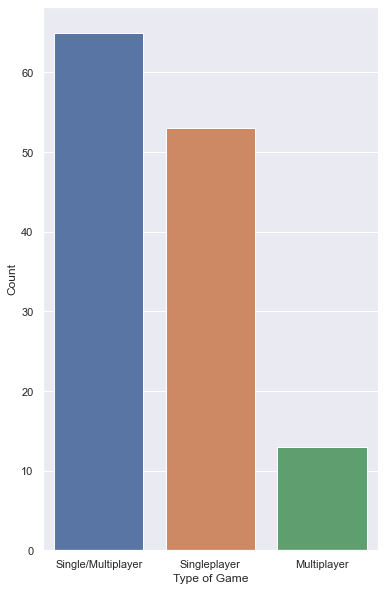

In [185]:
# Ploting bar graph for each type of game
data = [['Single/Multiplayer', len(multi_single)],['Singleplayer', len(only_single)],
        ['Multiplayer', len(only_multi)]]
gamesGraph = pd.DataFrame(data, columns = ['Type of Game', 'Count'])

f, axes = plt.subplots(figsize = [6,10])
sb.barplot(x = 'Type of Game', y = 'Count', data = gamesGraph)

gamesGraph

# Conclusion

From our results, more people are willing to try out games that allow both single and multiplayer options as compared to games that are solely singleplayer or multiplayer. Hence, creating a game that allows both methods of gameplay will increase the chances of it being played.